# Instabot Project Part-2

# Introduction and Instructions:


Hi There!!

This is the Instabot part 2- An instagram bot which will scrape some important information for you!!!


Following are some points which are worth reading before you look forward to run this program/notebook

1.Just run the complete code once. Do not run each Cell separatly

2.Let the driver window run in maximised mode. Do not run it in windowed mode(It will maximise by itself)

3.Do not make any changes in the code except the SAMPLE_USERNAME and SAMPLE_PASSWORD. you can easily change them by refering the code below.

4.This code is written and tested with 4G network(AIRTEL). 
if you are using a connection whose speed is not good at that point of time, you might want to change the time gap between several Cells(at the end of some cells there is a line of code whose parameters you might want to alter.

5.Sometimes you will feel like the website is frozen. No! Its not. The code is still running doing its work. You will notice this specially when this information from a instagram video is being scrapped.

# Function for Login To Instagram

In [1]:
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
driver=webdriver.Chrome(executable_path='C:\webdrivers\chromedriver')
driver.maximize_window()
#started webdriver
driver.get('https://www.instagram.com/')
time.sleep(6)
username=driver.find_element_by_name("username")
username.clear()
#Enter your Username
username.send_keys('SAMPLE USERNAME')
passw=driver.find_element_by_name("password")
passw.clear()
#Enter your Password
passw.send_keys('SAMPLE PASSWORD')
s=driver.find_element_by_xpath('//button[contains(@class,"L3NKy   ")]')
s.click()
#clicked the login button
time.sleep(6)
#Closing all the prompt Window(there were 2 prompt videos on my instagram pls change if urs doesn't match)
s=driver.find_element_by_class_name('cmbtv').click()
time.sleep(3)
s=driver.find_element_by_xpath('//button[contains(@class,"aOOlW   ")]')
s.click()

# Function for searching  the page

In [2]:
def search_to_page(text):
    s=driver.find_element_by_xpath('//input[contains(@class,"XTCLo ")]')
    s.clear()
    s.send_keys(text)

# Function for login to the page

In [3]:
def login_to_page(text):
    s=driver.find_elements_by_class_name('Ap253')
    for i in s:
        if(i.text==text):
            i.click()
            time.sleep(3)
            break

# Re-Scraping the instagram handles which will appear on typing "Food" in the search bar.

In [4]:
#searching for "food" again in the search bar and storing the top 10 usernames in a list
s=driver.find_element_by_xpath('//input[contains(@class,"XTCLo ")]')
s.clear()
handles=[]
s.send_keys("food")
time.sleep(5)
j=0
print('---------------------------------------------------------------------------------------------------------------')
print('First 10 Instagram Pages When We Search Food')
instau=driver.find_elements_by_class_name("Ap253")
for i in instau:
    if(j>=10):
        break
    a=i.text
    if(a[0]!='#'):
        handles.append(a)
        print(j+1,a)
        j+=1
print('---------------------------------------------------------------------------------------------------------------')
s.clear()
# list of top 10 users will be stored in this list(handles).

---------------------------------------------------------------------------------------------------------------
First 10 Instagram Pages When We Search Food
1 foodnetwork
2 foodinsider
3 foodtalkindia
4 foodbossindia
5 foodiesince96
6 dilsefoodie
7 food
8 foodnetworkkitchen
9 buzzfeedfood
10 foodbabyny
---------------------------------------------------------------------------------------------------------------


# Function To Get No Of Followers Of A Page

In [5]:
def no_followers():
    time.sleep(3)
    s=driver.find_element_by_xpath('//ul[contains(@class,"k9GMp")]/li[2]/a/span')
    l=s.get_attribute("title")
    return l

# Question 1
:Graphs asked in question 1.3 are drawn along with the subparts and not seperately for more clarity.

# Question 1.1 With Question 1.3 Graph

---------------------------------------------------------------------------------------------------------------
TOP 5 INSTAGRAM PAGES FROM THE FIRST 10 HANDLES WHEN WE SEARCH FOOD In Terms Of No Of Followers
1 : foodnetwork -------> 10265600
2 : buzzfeedfood -------> 3736386
3 : foodinsider -------> 2175355
4 : foodnetworkkitchen -------> 597201
5 : dilsefoodie -------> 490602
---------------------------------------------------------------------------------------------------------------


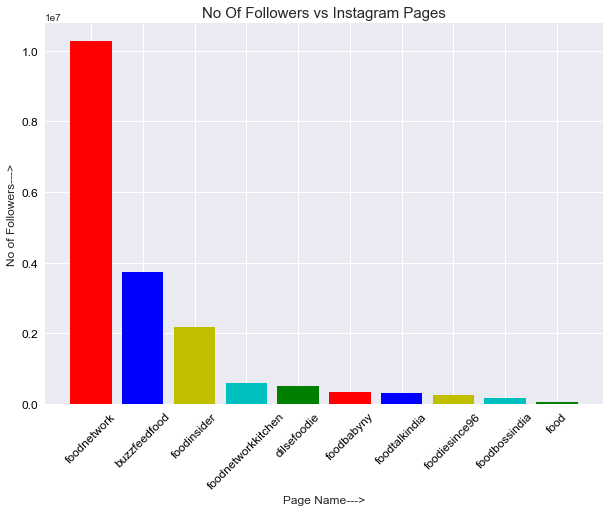

In [6]:
from collections import Counter
d={}
for i in range(10):
    search_to_page(handles[i])
    time.sleep(5)
    login_to_page(handles[i])
    time.sleep(5)
    s=no_followers()
    s=s.replace(',','')
    s=int(s)
    d[handles[i]]=d.get(handles[i],0)+s    
name=[]
no=[]
count=Counter(d)
high=count.most_common(10)
print('---------------------------------------------------------------------------------------------------------------')
print('TOP 5 INSTAGRAM PAGES FROM THE FIRST 10 HANDLES WHEN WE SEARCH FOOD In Terms Of No Of Followers')
for i in range(10):
    if(i<5):
        print(i+1,':',(high[i][0].strip()),"------->",high[i][1])
    name.append(high[i][0].strip())
    no.append(high[i][1])
print('---------------------------------------------------------------------------------------------------------------')
#plotting a graph between those 10 users and the number of followers
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
plt.xticks(size=11,color='black')
plt.yticks(size=11,color='black')
plt.title('No Of Followers vs Instagram Pages',size=15)
plt.xlabel('Page Name--->',size=12)
plt.ylabel('No of Followers--->',size=12)
plt.bar(name,no,color='rbycg')
plt.xticks(rotation=45, size=12,color='black')
plt.yticks(size=12,color='black')
plt.show()
followers=no[:5]
#following is a list of users with highest number of followers among those top 10.

# Function to Get Number Of Posts Done 3 Days Ago

In [9]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
def posts_no():
    s=driver.find_elements_by_class_name('_9AhH0')
    time.sleep(4)
    s[0].click()
    time.sleep(8)
    count=0
    flag=1
    while(flag==1):
        s=driver.find_element_by_xpath('//div[contains(@class,"k_Q0X NnvRN")]/a/time')
        t=s.text
        t=t.split()
        if((t[1]=='HOURS')|(t[1]=='MINUTES')|(t[1]=='HOUR')|(t[1]=='MINUTE')):
            count+=1
        else:
            if(((t[1]=='DAYS')|(t[1]=='DAY'))):
                if((int(t[0]))<=3):
                    count+=1
                else:
                    flag=0
                    break
            else:
                flag=0
                break
        l=driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        l.click()
        time.sleep(5)
    close_btn = driver.find_element_by_xpath('//div[contains(@class,"BI4qX")]//button')
    time.sleep(4)
    close_btn.click()
    return count    

# Question 1.2 With Question 1.3 Graph

In [10]:
import time
posts={}
for i in name[:5]:
    search_to_page(i)
    time.sleep(5)
    login_to_page(i)
    time.sleep(5)
    count=posts_no()
    posts[i]=posts.get(i,0)+count
    time.sleep(5)

---------------------------------------------------------------------------------------------------------------
NO OF POSTS DONE BY THE TOP 5 INSTAGRAM PAGES FROM THE FIRST 10 HANDLES WHEN WE SEARCH FOOD In TERMS OF FOLLOWERS
1 : foodnetwork -------> 35
2 : buzzfeedfood -------> 0
3 : foodinsider -------> 4
4 : foodnetworkkitchen -------> 19
5 : dilsefoodie -------> 2
---------------------------------------------------------------------------------------------------------------


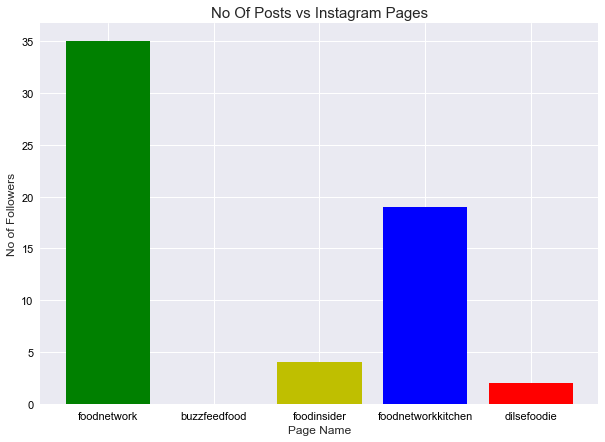

In [11]:
no=[]
print('---------------------------------------------------------------------------------------------------------------')
print('NO OF POSTS DONE BY THE TOP 5 INSTAGRAM PAGES FROM THE FIRST 10 HANDLES WHEN WE SEARCH FOOD In TERMS OF FOLLOWERS')
j=0
for i in posts:
    print(j+1,':',i,"------->",posts[i])
    no.append(posts[i])
    j+=1
print('---------------------------------------------------------------------------------------------------------------')
#graph between top 5 users and the number of posts
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
plt.xticks(size=11,color='black')
plt.yticks(size=11,color='black')
plt.title('No Of Posts vs Instagram Pages',size=15)
plt.xlabel('Page Name',size=12)
plt.ylabel('No of Followers',size=12)
name=name[:5]
plt.bar(name,no,color='gcybr')
plt.show()

# Question 2

# Function To Scrape The Content Of First N Posts

In [12]:
def scrape(n):
    s=driver.find_elements_by_class_name('_9AhH0')
    time.sleep(4)
    s[0].click()
    time.sleep(4)
    i=1
    content=[]
    while(i<=n):
        s=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
        content.append(s.get_attribute("textContent"))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        i+=1
        if(i<=n):
            l=driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
            l.click()
        time.sleep(2)
    close_btn = driver.find_element_by_xpath('//div[contains(@class,"BI4qX")]//button')
    close_btn.click()
    return content

# Question 2.1

In [13]:
#the idea is to visit each page and go to each of the 10 posts and scrape the content and hashtags from there and store them in the
#separate lists
hashtags=[]
for i in name:
    search_to_page(i)
    time.sleep(5)
    login_to_page(i)
    time.sleep(5)
    content=scrape(10)
#this is the scrapped content of all posts
    print('Content of First 10 Posts Of------>',i)
    j=0
    for i in content:
        print(j+1,':',i)
        j+=1
        print('---------------------------------------------------------------------------------------------------------------')

Content of First 10 Posts Of------> foodnetwork
1 : Baking some sweet treats for the 4th? Don't forget to use @emcdowell's tip for using parchment paper vs. aluminum foil! 🍪🎂🥧⁠⁠For more tips, take Erin's Soft Sugar Cookies class on the @foodnetworkkitchen app with the link in our bio.
---------------------------------------------------------------------------------------------------------------
2 : Recipe of the Day: Perfect Beef Burgers 🍔 Click the link in our bio to save the recipe on your @foodnetworkkitchen app!
---------------------------------------------------------------------------------------------------------------
3 : @ThePioneerWoman's Weeknight Pepper Pasta 🍝You're only 30 minutes away from @ThePioneerWoman's creamy, hearty pasta 🌶️ Catch a marathon of episodes with Ree and her family, starting today @ 9:30a|8:30c! Save the recipe on the @FoodNetworkKitchen app.
---------------------------------------------------------------------------------------------------------------

Content of First 10 Posts Of------> foodnetworkkitchen
1 : Baking some sweet treats for the 4th? Don't forget to use @emcdowell's tip for using parchment paper vs. aluminum foil! 🍪🎂🥧Take Erin's full Soft Sugar Cookies class on the #FoodNetworkKitchen app for more tips.
---------------------------------------------------------------------------------------------------------------
2 : Need some cooking inspo for the 4th? ✨ Join @larisaelena as she breaks down the basics to making a few classic BBQ side dishes (think: Classic Potato Salad, American Macaroni Salad and more), plus a dessert everyone will love!Take Larisa's new Summer Sides and Sweets course on the #FoodNetworkKitchen app today.
---------------------------------------------------------------------------------------------------------------
3 : Class of the Day: Strawberry Shortcake 🍓 Celebrate the 4th the best way possible: a GIANT Strawberry Shortcake 🍰 @jessiesheehanbakes walks you through baking the cake, then filling it w

# Question 2.2

In [14]:
# here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency 
# of all the words in the content. 
import numpy as np
hashtags=np.array(hashtags)
hashtag={}
for i in hashtags:
    if(('@' not in i )and (i!='')):
        #this is our dictionary which contains all the frequencies of the hashtags
        hashtag[i]=hashtag.get(i,0)+1

In [15]:
#we have the two arrays named hash_word and frequency.
#we will first arrange them in descending order and then print the hashtags that were most popular among them.
words=[]
frequency=[]
print('---------------------------------------------------------------------------------------------------------------')
print('Hashtags Used By Bloggers----------------------->')
for i in hashtag:
    print(i[1:],'---------->',hashtag[i])
    words.append(i[1:])
    frequency.append(hashtag[i])
print('---------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------
Hashtags Used By Bloggers----------------------->
ad ----------> 1
RedRawOnions ----------> 1
TheKitchen ----------> 1
RestaurantImpossible ----------> 1
likeforlikes ----------> 1
like4likes ----------> 1
likeforfollow ----------> 1
likeforlikeback ----------> 1
follow4followback ----------> 1
follow ----------> 1
MADDYCOOKS💞 ----------> 1
bringme ----------> 1
portlandtravel ----------> 1
sushirestuarant ----------> 1
sushi ----------> 1
oregontravel ----------> 1
sustainability ----------> 1
halal ----------> 1
nyc ----------> 3
nycfood ----------> 1
LegendaryEats ----------> 1
streetfood ----------> 1
FoodInsider ----------> 7
sauce ----------> 1
condiment ----------> 1
ketchup ----------> 1
sugar ----------> 1
pizza ----------> 2
pizzaBK ----------> 1
food ----------> 6
hotdogs🌭 ----------> 1
hotdog ----------> 1
Chicago ----------> 1
Chicagodogs ----------> 1
Paris ----

# Question 2.3

In [16]:
import pandas as pd
df=pd.DataFrame()
df['Words']=words
df['Frequency']=frequency
df.to_csv('Hashtags_Frequency09.csv')
#hence the file is saved in the working directory

# Question 2.4

In [17]:
names=[]
no=[]
count=Counter(hashtag)
high=count.most_common(len(words))
print('---------------------------------------------------------------------------------------------------------------')
print('MOST POPULAR HASHTAGS AMONG THE BLOGGERS IN TERMS OF THERE FREQUENCIES')
for i in range(len(words)):
    print(i+1,':',(high[i][0][1:].strip()),"------->",high[i][1])
    names.append(high[i][0][1:].strip())
    no.append(high[i][1])
print('---------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------
MOST POPULAR HASHTAGS AMONG THE BLOGGERS IN TERMS OF THERE FREQUENCIES
1 : dilsefoodie -------> 10
2 : FoodNetworkKitchen -------> 9
3 : FoodInsider -------> 7
4 : food -------> 6
5 : nyc -------> 3
6 : pizza -------> 2
7 : FoodFood -------> 2
8 : ad -------> 1
9 : RedRawOnions -------> 1
10 : TheKitchen -------> 1
11 : RestaurantImpossible -------> 1
12 : likeforlikes -------> 1
13 : like4likes -------> 1
14 : likeforfollow -------> 1
15 : likeforlikeback -------> 1
16 : follow4followback -------> 1
17 : follow -------> 1
18 : MADDYCOOKS💞 -------> 1
19 : bringme -------> 1
20 : portlandtravel -------> 1
21 : sushirestuarant -------> 1
22 : sushi -------> 1
23 : oregontravel -------> 1
24 : sustainability -------> 1
25 : halal -------> 1
26 : nycfood -------> 1
27 : LegendaryEats -------> 1
28 : streetfood -------> 1
29 : sauce -------> 1
30 : condiment -------> 1
31 : ketchu

# Question 2.5

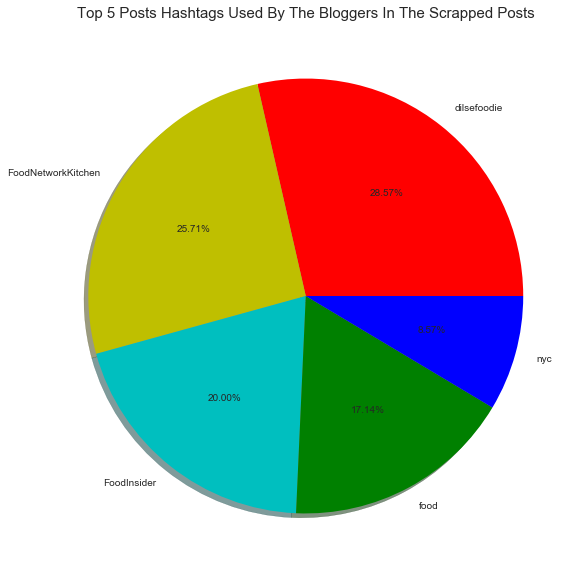

In [18]:
plt.figure(figsize=(10,10))
plt.pie(no[:5],shadow=True,labels=names[:5],autopct='%.2f%%',colors='rycgb')
plt.title('Top 5 Posts Hashtags Used By The Bloggers In The Scrapped Posts',size=15)
plt.show()

# Question 3.1

# Function To Get No Of Likes Of First N posts

In [19]:
 #clicks on the post of the user being iterated.
from selenium.webdriver.common.keys import Keys
def likes(n):
    likes_=0
    j=0
    for i in driver.find_elements_by_class_name('_9AhH0'):
        i.click()
        time.sleep(5)
        s=driver.find_elements_by_xpath('//div[contains(@class,"Nm9Fw")]/button/span')
        if(len(s)>0):
            t=s[0].text
            t=t.strip()
            t=t.replace(',','')
            likes_+=int(t)
            j+=1
        else:
            s=driver.find_element_by_class_name('vcOH2')                    
            s.click()
            time.sleep(5)
            p=driver.find_element_by_xpath('//div[contains(@class,"vJRqr")]//span')
            t=p.text
            t=t.strip()
            t=t.replace(',','')
            likes_+=int(t)
            j+=1
        if(j>=n):
            driver.find_element_by_tag_name('body').send_keys(Keys.ESCAPE)
            time.sleep(4)
            break
        driver.find_element_by_tag_name('body').send_keys(Keys.ESCAPE)
        time.sleep(4)
    return likes_


In [20]:
like={}
for i in name:
    search_to_page(i)
    time.sleep(5)
    login_to_page(i)
    t=likes(10)
    like[i]=like.get(i,0)+t

---------------------------------------------------------------------------------------------------------------
Number Of Likes of The Top 10 Posts Of The Top 5 Handles IN Terms Of Following
1 : foodnetwork -----------------------------> 95282
2 : buzzfeedfood -----------------------------> 60304
3 : foodinsider -----------------------------> 125554
4 : foodnetworkkitchen -----------------------------> 8630
5 : dilsefoodie -----------------------------> 95214
---------------------------------------------------------------------------------------------------------------


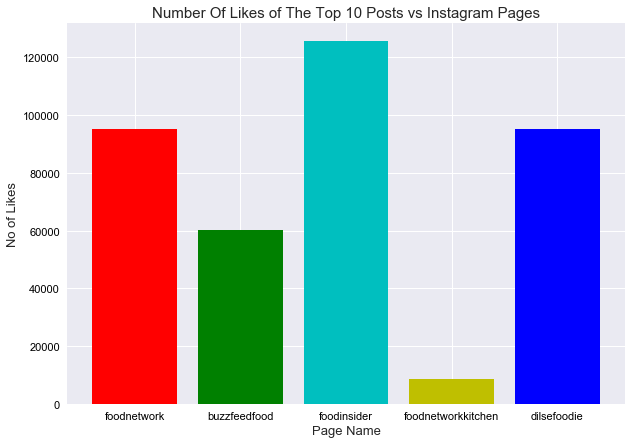

In [21]:
#likes on the top 10 posts for those 5 users
print('---------------------------------------------------------------------------------------------------------------')
print('Number Of Likes of The Top 10 Posts Of The Top 5 Handles IN Terms Of Following')
j=1
for i in like:
    print(j,':',i,'----------------------------->',like[i])
    j+=1
print('---------------------------------------------------------------------------------------------------------------')
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
plt.title('Number Of Likes of The Top 10 Posts vs Instagram Pages',size=15)
plt.xticks(size=11,color='black')
plt.yticks(size=11,color='black')
plt.xlabel('Page Name',size=13)
plt.ylabel('No of Likes',size=13)
plt.bar(like.keys(),like.values(),color='rgcyb')
plt.show()

# Question 3.2

---------------------------------------------------------------------------------------------------------------
Average Number Of Likes of The Top 10 Posts Of The Top 5 Handles IN Terms Of Following
1 : foodnetwork -----------------------------> 9528.2
2 : buzzfeedfood -----------------------------> 6030.4
3 : foodinsider -----------------------------> 12555.4
4 : foodnetworkkitchen -----------------------------> 863.0
5 : dilsefoodie -----------------------------> 9521.4
---------------------------------------------------------------------------------------------------------------


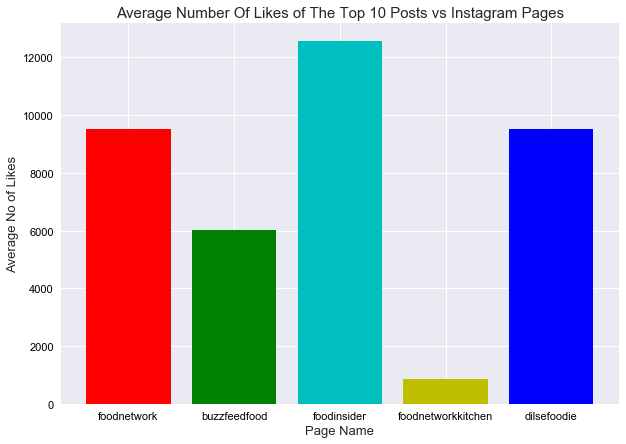

In [22]:
#these are the average likes of the respective 5 users
print('---------------------------------------------------------------------------------------------------------------')
print('Average Number Of Likes of The Top 10 Posts Of The Top 5 Handles In Terms Of Following')
j=1
average_likes=[]
for i in like:
    like[i]=like[i]/10
    average_likes.append(like[i])
    print(j,':',i,'----------------------------->',like[i])
    j+=1
print('---------------------------------------------------------------------------------------------------------------')
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
plt.title('Average Number Of Likes of The Top 10 Posts vs Instagram Pages',size=15)
plt.xticks(size=11,color='black')
plt.yticks(size=11,color='black')
plt.xlabel('Page Name',size=13)
plt.ylabel('Average No of Likes',size=13)
plt.bar(like.keys(),like.values(),color='rgcyb')
plt.show()

# Question 3.3

In [23]:
#for getting average followers to likes ratio
ratio=[]
for i in range(5):
    ratio.append(followers[i]/average_likes[i])
print('---------------------------------------------------------------------------------------------------------------')
print('Average Number Of Likes of The Top 10 Posts Of The Top 5 Handles IN Terms Of Following')
j=1
for i in range(5):
    print(j,':',name[i],'----------------------------->',ratio[i])
    j+=1
print('---------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------
Average Number Of Likes of The Top 10 Posts Of The Top 5 Handles IN Terms Of Following
1 : foodnetwork -----------------------------> 1077.3913226002812
2 : buzzfeedfood -----------------------------> 619.5917352082781
3 : foodinsider -----------------------------> 173.26050942224063
4 : foodnetworkkitchen -----------------------------> 692.0057937427579
5 : dilsefoodie -----------------------------> 51.52624614027349
---------------------------------------------------------------------------------------------------------------


# Question 3.4

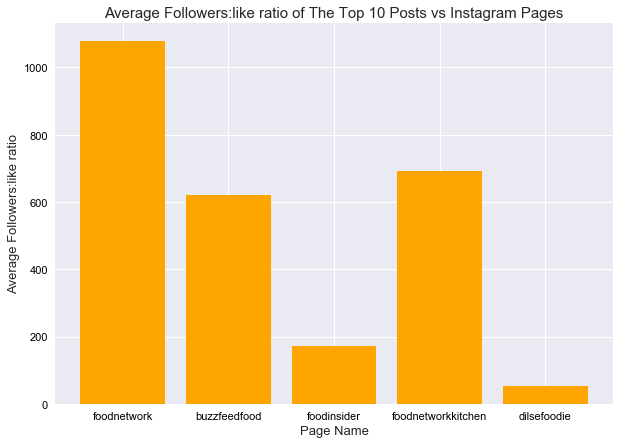

In [24]:
#plotting the graph between average followers to the likes ratio and users
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
plt.title('Average Followers:like ratio of The Top 10 Posts vs Instagram Pages',size=15)
plt.xticks(size=11,color='black')
plt.yticks(size=11,color='black')
plt.xlabel('Page Name',size=13)
plt.ylabel('Average Followers:like ratio',size=13)
plt.bar(name[:5],ratio,color='orange')
plt.show()